- import all librairies
- import train 80.csv file and val/ create source and dataset
- split every 10% (0.1 until 0.9)
- train models: ensemble and deepnet
- prediction on val 20%
- AUC
- add the deepnet curve
- ensemble learning curves: training splitted set vs validation set/do the - same for the deepent

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import bigml.api
from bigml.api import BigML


api= BigML (project='project/5d94a52e5a213962e2000331')

# train_set = read_csv('train_dataset_80.csv')
# validation_set = read_csv('val.csv')

### Create the source and dataset for the train_dataset_80

In [5]:
train_source = api.create_source('train_dataset_80.csv')
api.ok(train_source)

True

In [6]:
train_dataset = api.create_dataset(train_source)
api.ok(train_dataset)

True

### Create the source and dataset for the val set (dev set)

In [7]:
val_source = api.create_source('val.csv')
api.ok(val_source)

True

In [8]:
val_dataset = api.create_dataset(val_source)
api.ok(val_dataset)

True

## Curve Nb_data Vs AUC

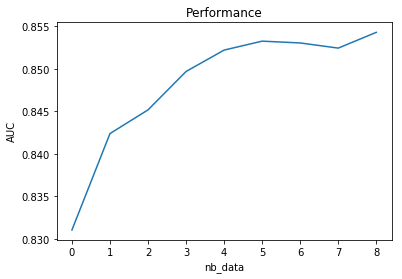

In [67]:
#Create a function named sum_split_auc to compare the auc from different split (split_rate)
def sum_split_auc(split_rate):
    
    # Split in function of the split_rate 
    train_set_splitted = api.create_dataset(train_dataset,
        {"name": "train_set_splitted", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_set_splitted)
    
    #Train on the ensemble model
    ensemble = api.create_ensemble(train_set_splitted, {"objective_field":"SeriousDlqin2yrs"})
    api.ok(ensemble)
    
    #Prediction on the val_set
    batch_prediction_val_set = api.create_batch_prediction(ensemble, val_dataset,
        {"header": True, "all_fields": True,"prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction_val_set)
    
    api.download_batch_prediction(batch_prediction_val_set,filename = 'Prediction_val_set_split.csv')
    
    #Define the dataframe with the csv
    df = pd.read_csv('Prediction_val_set_split.csv', index_col = 0)
    
    #Calculate the AUC
    pos = df.loc[df['SeriousDlqin2yrs'] == 1]
    neg = df.loc[df['SeriousDlqin2yrs'] == 0] 
    x = 0
    y = 0
    
    for threshold_pos in pos['1 probability']: 
        for threshold_neg in neg['1 probability']:
            if threshold_pos > threshold_neg:
                x += 1 
            y += 1  
    return(x/y) #AUC formula
    
# Define the n = 1/10 (100/10, do ten time the split)/Create the table Perfomance: nb_data/AUC
table = [sum_split_auc(n/10) for n in range(1,11)]
plt.xlabel("nb_data")
plt.ylabel("AUC")
plt.title("Performance")
plt.plot(table)

## AUC ensemble Vs AUC deepnet

0.8311332683983932
0.7570473370393834
0.8425975808557491
0.7772554155429774
0.846067553913808
0.7853700604409222
0.8488304661616402
0.7810068935369932
0.8522604319666109
0.7820496003043105
0.8539536112708377
0.7814735916218853
0.8529558771958214
0.7854416514341475
0.8540549771656297
0.7851421290473317
0.8533165099523805
0.7713515437860853
0.8548258084023211
0.7809392039602925


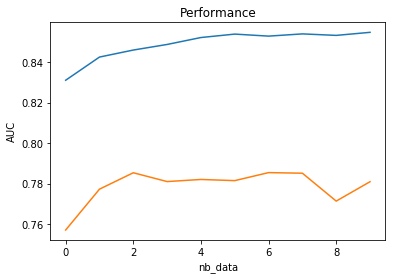

In [7]:
def sum_split_auc(split_rate):
    
    # Split in function of the split_rate 
    train_set_splitted = api.create_dataset(train_dataset,
        {"name": "train_set_splitted", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_set_splitted)
    
    #Train on the ensemble model
    ensemble = api.create_ensemble(train_set_splitted, {"objective_field":"SeriousDlqin2yrs"})
    api.ok(ensemble)
    
    #Prediction on the val_set_ensemble
    batch_prediction_val_set_ensemble = api.create_batch_prediction(ensemble, val_dataset,
        {"header": True, "all_fields": True,"prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction_val_set_ensemble)
    
    api.download_batch_prediction(batch_prediction_val_set_ensemble,filename = 'Prediction_val_set_split_ensemble.csv')
    
    #Define the dataframe with the csv
    df_ensemble = pd.read_csv('Prediction_val_set_split_ensemble.csv', index_col = 0)
    
    #Calculate the AUC_ensemble
    pos = df_ensemble.loc[df_ensemble['SeriousDlqin2yrs'] == 1]
    neg = df_ensemble.loc[df_ensemble['SeriousDlqin2yrs'] == 0] 
    x = 0
    y = 0
    
    for threshold_pos in pos['1 probability']: 
        for threshold_neg in neg['1 probability']:
            if threshold_pos > threshold_neg:
                x += 1 
            y += 1 
            auc_ensemble = x/y #AUC formula
    print(auc_ensemble) 

    #Train on the deepnet model
    deepnet = api.create_deepnet(train_set_splitted, {"objective_field":"SeriousDlqin2yrs"})
    api.ok(deepnet)
    
    #Prediction on the val_set_deepnet
    batch_prediction_val_set_deepnet = api.create_batch_prediction(deepnet, val_dataset,
        {"header": True, "all_fields": True,"prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction_val_set_deepnet)
    
    api.download_batch_prediction(batch_prediction_val_set_deepnet,filename = 'Prediction_val_set_split_deepnet.csv')
    
    #Define the dataframe with the deepnet_csv
    df_deepnet = pd.read_csv('Prediction_val_set_split_deepnet.csv', index_col = 0)
    
    #Calculate the AUC_deepnet
    pos = df_deepnet.loc[df_deepnet['SeriousDlqin2yrs'] == 1]
    neg = df_deepnet.loc[df_deepnet['SeriousDlqin2yrs'] == 0] 
    x = 0
    y = 0
    
    for threshold_pos in pos['1 probability']: 
        for threshold_neg in neg['1 probability']:
            if threshold_pos > threshold_neg:
                x += 1 
            y += 1 
            auc_deepnet = x/y #AUC formula
    print(auc_deepnet) 
    
    return(auc_ensemble, auc_deepnet) #Return the two curves
    
    
# Define the n = 1/10 (100/10, do ten time the split (from 1 to 11))/Create the table Perfomance: nb_data/AUC
table = [sum_split_auc(n/10) for n in range(1,11)]
plt.xlabel("nb_data")
plt.ylabel("AUC")
plt.title("Performance")
plt.plot(table)

## AUC ensemble val_set vs training_split_set

0.9778772174436534
0.8327489513834734
0.9422063602089428
0.8419073848051354
0.9234512052647105
0.8454794508401567
0.9107810690370132
0.8501647151456093
0.9041845026346537
0.8521234213117538
0.8985111587731156
0.8522818365563615
0.8951685928817332
0.8525894632493214
0.8911295835489467
0.8532254473439556
0.8889744676197487
0.8542577444226369


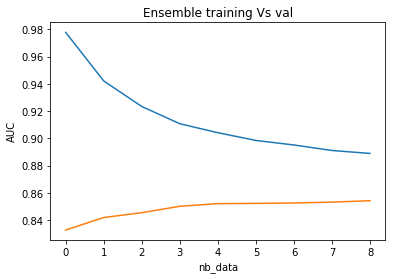

In [14]:
#Create a function named sum_split_auc to compare the auc from different split (split_rate)
def sum_split_auc(split_rate):
    
    # Split in function of the split_rate 
    train_set_splitted = api.create_dataset(train_dataset,
        {"name": "train_set_splitted", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_set_splitted)
    
    #Train on the ensemble model
    ensemble = api.create_ensemble(train_set_splitted, {"objective_field":"SeriousDlqin2yrs"})
    api.ok(ensemble)
    
    #Prediction on the training split set to have the training error curve
    batch_prediction_training = api.create_batch_prediction(ensemble, train_set_splitted,
        {"header": True, "all_fields": True,"prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction_training)
    
    api.download_batch_prediction(batch_prediction_training,filename = 'Prediction_training.csv')
    
    #Define the training_dataframe with the csv
    df_training = pd.read_csv('Prediction_training.csv', index_col = 0)
    
    #Calculate the AUC df_training
    pos = df_training.loc[df_training['SeriousDlqin2yrs'] == 1]
    neg = df_training.loc[df_training['SeriousDlqin2yrs'] == 0] 
    x = 0
    y = 0
    
    for threshold_pos in pos['1 probability']: 
        for threshold_neg in neg['1 probability']:
            if threshold_pos > threshold_neg:
                x += 1 
            y += 1  
            auc_training= x/y #AUC formula
    print(auc_training)
    
    #Prediction on the val_set
    batch_prediction_val_set = api.create_batch_prediction(ensemble, val_dataset,
        {"header": True, "all_fields": True,"prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction_val_set)
    
    api.download_batch_prediction(batch_prediction_val_set,filename = 'Prediction_val_set_split.csv')
    
    #Define the val_dataframe with the csv
    df_val = pd.read_csv('Prediction_val_set_split.csv', index_col = 0)
    
    #Calculate the AUC
    pos = df_val.loc[df_val['SeriousDlqin2yrs'] == 1]
    neg = df_val.loc[df_val['SeriousDlqin2yrs'] == 0] 
    x = 0
    y = 0
    
    for threshold_pos in pos['1 probability']: 
        for threshold_neg in neg['1 probability']:
            if threshold_pos > threshold_neg:
                x += 1 
            y += 1 
            auc_val = x/y #AUC formula
    print(auc_val) 
    
    return(auc_training, auc_val) #Return the two curves
    
# Define the n = 1/10 (100/10, do ten time the split)/Create the table Perfomance: nb_data/AUC
table = [sum_split_auc(n/10) for n in range(1,11)]
plt.xlabel("nb_data")
plt.ylabel("AUC")
plt.title("Ensemble training Vs val")
plt.plot(table)

## AUC deepnet val_set vs training_split_set

In [7]:
#Create a function named sum_split_auc to compare the auc from different split (split_rate)
def sum_split_auc(split_rate):
    
    # Split in function of the split_rate 
    train_set_splitted = api.create_dataset(train_dataset,
        {"name": "train_set_splitted", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_set_splitted)
    
    #Train on the deepnet model
    deepnet = api.create_deepnet(train_set_splitted, {"objective_field":"SeriousDlqin2yrs"})
    api.ok(deepnet)
    
    #Prediction on the training split set to have the training error curve
    batch_prediction_training = api.create_batch_prediction(deepnet, train_set_splitted,
        {"header": True, "all_fields": True,"prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction_training)
    
    api.download_batch_prediction(batch_prediction_training,filename = 'Prediction_training_deepnet.csv')
    
    #Define the training_dataframe with the csv
    df_training = pd.read_csv('Prediction_training_deepnet.csv', index_col = 0)
    
    #Calculate the AUC df_training
    pos = df_training.loc[df_training['SeriousDlqin2yrs'] == 1]
    neg = df_training.loc[df_training['SeriousDlqin2yrs'] == 0] 
    x = 0
    y = 0
    
    for threshold_pos in pos['1 probability']: 
        for threshold_neg in neg['1 probability']:
            if threshold_pos > threshold_neg:
                x += 1 
            y += 1  
            auc_training= x/y #AUC formula
    print(auc_training)
    
    #Prediction on the val_set
    batch_prediction_val_set = api.create_batch_prediction(deepnet, val_dataset,
        {"header": True, "all_fields": True,"prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction_val_set)
    
    api.download_batch_prediction(batch_prediction_val_set,filename = 'Prediction_val_deepnet.csv')
    
    #Define the val_dataframe with the csv
    df_val = pd.read_csv('Prediction_val_deepnet.csv', index_col = 0)
    
    #Calculate the AUC
    pos = df_val.loc[df_val['SeriousDlqin2yrs'] == 1]
    neg = df_val.loc[df_val['SeriousDlqin2yrs'] == 0] 
    x = 0
    y = 0
    
    for threshold_pos in pos['1 probability']: 
        for threshold_neg in neg['1 probability']:
            if threshold_pos > threshold_neg:
                x += 1 
            y += 1 
            auc_val = x/y #AUC formula
    print(auc_val) 
    
    return(auc_training, auc_val) #Return the two curves
    
# Define the n = 1/10 (100/10, do ten time the split)/Create the table Perfomance: nb_data/AUC
table = [sum_split_auc(n/10) for n in range(1,11)]
plt.xlabel("nb_data")
plt.ylabel("AUC")
plt.title("Deepenet training Vs val")
plt.plot(table)

KeyboardInterrupt: 

## Optimizing code for learning curves

### Split the train_set in function of the split_rate 

In [9]:
#Crate function for splitting every 10% 
def split_train(split_rate):

    train_set_splitted = api.create_dataset(train_dataset,{"name": "train_set_splitted", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_set_splitted)
    
    return train_set_splitted

# Split (n/100)
train_10 = split_train(10/100)
train_20 = split_train(20/100)
train_30 = split_train(30/100)
train_40 = split_train(40/100)
train_50 = split_train(50/100)
train_60 = split_train(60/100)
train_70 = split_train(70/100)
train_80 = split_train(80/100)
train_90 = split_train(90/100)


### Train on the ensemble model

In [12]:
# Function to train the ensemble_model on a dataset
def ensemble_model(dataset):
    
    ensemble = api.create_ensemble(dataset, {"objective_field":"SeriousDlqin2yrs"})
    api.ok(ensemble)
    
    return ensemble

# Definition of datasets used to train the ensemble
ensemble_10 = ensemble_model(train_10)
ensemble_20 = ensemble_model(train_20)
ensemble_30 = ensemble_model(train_30)
ensemble_40 = ensemble_model(train_40)
ensemble_50 = ensemble_model(train_50)
ensemble_60 = ensemble_model(train_60)
ensemble_70 = ensemble_model(train_70)
ensemble_80 = ensemble_model(train_80)
ensemble_90 = ensemble_model(train_90)
ensemble_100 = ensemble_model(train_dataset)

### Train on the deepnet model

In [13]:
# Function to train the deepnet_model on a dataset
def deepnet_model(dataset):
    
    deepnet = api.create_deepnet(dataset, {"objective_field":"SeriousDlqin2yrs"})
    api.ok(deepnet)
    
    return deepnet

# Definition of datasets used to train the deepnet
deepnet_10 = deepnet_model(train_10)
deepnet_20 = deepnet_model(train_20)
deepnet_30 = deepnet_model(train_30)
deepnet_40 = deepnet_model(train_40)
deepnet_50 = deepnet_model(train_50)
deepnet_60 = deepnet_model(train_60)
deepnet_70 = deepnet_model(train_70)
deepnet_80 = deepnet_model(train_80)
deepnet_90 = deepnet_model(train_90)
deepnet_100 = deepnet_model(train_dataset)

### Prediction on the val_set after deepnet

In [14]:
# Make prediction on the val set using all the splitted train trained with deepnet
def prediction_val_deepnet(model, dataset):
    
    batch_prediction_val_set_deepnet = api.create_batch_prediction(model, dataset,
        {"header": True, "all_fields": True,"prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction_val_set_deepnet)
    
    return batch_prediction_val_set_deepnet

# Definition of the 'model' datasets
batch_prediction_val_set_deepnet_10 = prediction_val_deepnet(deepnet_10, val_dataset)
batch_prediction_val_set_deepnet_20 = prediction_val_deepnet(deepnet_20, val_dataset)
batch_prediction_val_set_deepnet_30 = prediction_val_deepnet(deepnet_30, val_dataset)
batch_prediction_val_set_deepnet_40 = prediction_val_deepnet(deepnet_40, val_dataset)
batch_prediction_val_set_deepnet_50 = prediction_val_deepnet(deepnet_50, val_dataset)
batch_prediction_val_set_deepnet_60 = prediction_val_deepnet(deepnet_60, val_dataset)
batch_prediction_val_set_deepnet_70 = prediction_val_deepnet(deepnet_70, val_dataset)
batch_prediction_val_set_deepnet_80 = prediction_val_deepnet(deepnet_80, val_dataset)
batch_prediction_val_set_deepnet_90 = prediction_val_deepnet(deepnet_90, val_dataset)
batch_prediction_val_set_deepnet_100 = prediction_val_deepnet(deepnet_100, val_dataset)

### Download the prediction on val set using deepnet

In [15]:
api.download_batch_prediction(batch_prediction_val_set_deepnet_10,filename = 'Prediction_val_deepnet_10.csv')
api.download_batch_prediction(batch_prediction_val_set_deepnet_20,filename = 'Prediction_val_deepnet_20.csv')
api.download_batch_prediction(batch_prediction_val_set_deepnet_30,filename = 'Prediction_val_deepnet_30.csv')
api.download_batch_prediction(batch_prediction_val_set_deepnet_40,filename = 'Prediction_val_deepnet_40.csv')
api.download_batch_prediction(batch_prediction_val_set_deepnet_50,filename = 'Prediction_val_deepnet_50.csv')
api.download_batch_prediction(batch_prediction_val_set_deepnet_60,filename = 'Prediction_val_deepnet_60.csv')
api.download_batch_prediction(batch_prediction_val_set_deepnet_70,filename = 'Prediction_val_deepnet_70.csv')
api.download_batch_prediction(batch_prediction_val_set_deepnet_80,filename = 'Prediction_val_deepnet_80.csv')
api.download_batch_prediction(batch_prediction_val_set_deepnet_90,filename = 'Prediction_val_deepnet_90.csv')
api.download_batch_prediction(batch_prediction_val_set_deepnet_100,filename = 'Prediction_val_deepnet_100.csv')


'Prediction_val_deepnet_100.csv'

### Prediction on the val_set after ensemble

In [17]:
# Make prediction on the val set using all the splitted train trained with ensemble
def prediction_val_ensemble(model, dataset):
    
    batch_prediction_val_set_ensemble = api.create_batch_prediction(model, dataset,
        {"header": True, "all_fields": True,"prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction_val_set_ensemble)
    
    return batch_prediction_val_set_ensemble

# Definition of the 'model' datasets
batch_prediction_val_set_ensemble_10 = prediction_val_ensemble(ensemble_10, val_dataset)
batch_prediction_val_set_ensemble_20 = prediction_val_ensemble(ensemble_20, val_dataset)
batch_prediction_val_set_ensemble_30 = prediction_val_ensemble(ensemble_30, val_dataset)
batch_prediction_val_set_ensemble_40 = prediction_val_ensemble(ensemble_40, val_dataset)
batch_prediction_val_set_ensemble_50 = prediction_val_ensemble(ensemble_50, val_dataset)
batch_prediction_val_set_ensemble_60 = prediction_val_ensemble(ensemble_60, val_dataset)
batch_prediction_val_set_ensemble_70 = prediction_val_ensemble(ensemble_70, val_dataset)
batch_prediction_val_set_ensemble_80 = prediction_val_ensemble(ensemble_80, val_dataset)
batch_prediction_val_set_ensemble_90 = prediction_val_ensemble(ensemble_90, val_dataset)
batch_prediction_val_set_ensemble_100 = prediction_val_ensemble(ensemble_100, val_dataset)

### Download the prediction on val set using ensemble

In [18]:
api.download_batch_prediction(batch_prediction_val_set_ensemble_10,filename = 'Prediction_val_ensemble_10.csv')
api.download_batch_prediction(batch_prediction_val_set_ensemble_20,filename = 'Prediction_val_ensemble_20.csv')
api.download_batch_prediction(batch_prediction_val_set_ensemble_30,filename = 'Prediction_val_ensemble_30.csv')
api.download_batch_prediction(batch_prediction_val_set_ensemble_40,filename = 'Prediction_val_ensemble_40.csv')
api.download_batch_prediction(batch_prediction_val_set_ensemble_50,filename = 'Prediction_val_ensemble_50.csv')
api.download_batch_prediction(batch_prediction_val_set_ensemble_60,filename = 'Prediction_val_ensemble_60.csv')
api.download_batch_prediction(batch_prediction_val_set_ensemble_70,filename = 'Prediction_val_ensemble_70.csv')
api.download_batch_prediction(batch_prediction_val_set_ensemble_80,filename = 'Prediction_val_ensemble_80.csv')
api.download_batch_prediction(batch_prediction_val_set_ensemble_90,filename = 'Prediction_val_ensemble_90.csv')
api.download_batch_prediction(batch_prediction_val_set_ensemble_100,filename = 'Prediction_val_ensemble_100.csv')

'Prediction_val_ensemble_100.csv'

### Prediction on the train splitted set after ensemble

In [23]:
# Make prediction on the splitted train set using their splitted train trained with ensemble
def prediction_train_ensemble(model, dataset):
    
    batch_prediction_training_ensemble = api.create_batch_prediction(model, dataset,
        {"header": True, "all_fields": True,"prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction_training_ensemble)
    
    return batch_prediction_training_ensemble

# Definition of the datasets
batch_prediction_training_ensemble_10 = prediction_train_ensemble(ensemble_10, train_10)
batch_prediction_training_ensemble_20 = prediction_train_ensemble(ensemble_20, train_20)
batch_prediction_training_ensemble_30 = prediction_train_ensemble(ensemble_30, train_30)
batch_prediction_training_ensemble_40 = prediction_train_ensemble(ensemble_40, train_40)
batch_prediction_training_ensemble_50 = prediction_train_ensemble(ensemble_50, train_50)
batch_prediction_training_ensemble_60 = prediction_train_ensemble(ensemble_60, train_60)
batch_prediction_training_ensemble_70 = prediction_train_ensemble(ensemble_70, train_70)
batch_prediction_training_ensemble_80 = prediction_train_ensemble(ensemble_80, train_80)
batch_prediction_training_ensemble_90 = prediction_train_ensemble(ensemble_90, train_90)
batch_prediction_training_ensemble_100 = prediction_train_ensemble(ensemble_100, train_dataset)

### Download prediction train splitted trained with ensemble

In [24]:
api.download_batch_prediction(batch_prediction_training_ensemble_10,filename = 'Prediction_train_ensemble_10.csv')
api.download_batch_prediction(batch_prediction_training_ensemble_20,filename = 'Prediction_train_ensemble_20.csv')
api.download_batch_prediction(batch_prediction_training_ensemble_30,filename = 'Prediction_train_ensemble_30.csv')
api.download_batch_prediction(batch_prediction_training_ensemble_40,filename = 'Prediction_train_ensemble_40.csv')
api.download_batch_prediction(batch_prediction_training_ensemble_50,filename = 'Prediction_train_ensemble_50.csv')
api.download_batch_prediction(batch_prediction_training_ensemble_60,filename = 'Prediction_train_ensemble_60.csv')
api.download_batch_prediction(batch_prediction_training_ensemble_70,filename = 'Prediction_train_ensemble_70.csv')
api.download_batch_prediction(batch_prediction_training_ensemble_80,filename = 'Prediction_train_ensemble_80.csv')
api.download_batch_prediction(batch_prediction_training_ensemble_90,filename = 'Prediction_train_ensemble_90.csv')
api.download_batch_prediction(batch_prediction_training_ensemble_100,filename = 'Prediction_train_ensemble_100.csv')

'Prediction_train_ensemble_100.csv'

### Prediction on train splitted set trained with deepnet

In [29]:
def prediction_train_deepnet(model, dataset):
    
    batch_prediction_training_deepnet = api.create_batch_prediction(model, dataset,
        {"header": True, "all_fields": True,"prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction_training_deepnet)
    
    return batch_prediction_training_deepnet

# Definition of the datasets
batch_prediction_training_deepnet_10 = prediction_train_deepnet(deepnet_10, train_10)
batch_prediction_training_deepnet_20 = prediction_train_deepnet(deepnet_20, train_20)
batch_prediction_training_deepnet_30 = prediction_train_deepnet(deepnet_30, train_30)
batch_prediction_training_deepnet_40 = prediction_train_deepnet(deepnet_40, train_40)
batch_prediction_training_deepnet_50 = prediction_train_deepnet(deepnet_50, train_50)
batch_prediction_training_deepnet_60 = prediction_train_deepnet(deepnet_60, train_60)
batch_prediction_training_deepnet_70 = prediction_train_deepnet(deepnet_70, train_70)
batch_prediction_training_deepnet_80 = prediction_train_deepnet(deepnet_80, train_80)
batch_prediction_training_deepnet_90 = prediction_train_deepnet(deepnet_90, train_90)
batch_prediction_training_deepnet_100 = prediction_train_deepnet(deepnet_100, train_dataset)

### Download prediction on train split set trained with deepnet

In [31]:
api.download_batch_prediction(batch_prediction_training_deepnet_10,filename = 'Prediction_train_deepnet_10.csv')
api.download_batch_prediction(batch_prediction_training_deepnet_20,filename = 'Prediction_train_deepnet_20.csv')
api.download_batch_prediction(batch_prediction_training_deepnet_30,filename = 'Prediction_train_deepnet_30.csv')
api.download_batch_prediction(batch_prediction_training_deepnet_40,filename = 'Prediction_train_deepnet_40.csv')
api.download_batch_prediction(batch_prediction_training_deepnet_50,filename = 'Prediction_train_deepnet_50.csv')
api.download_batch_prediction(batch_prediction_training_deepnet_60,filename = 'Prediction_train_deepnet_60.csv')
api.download_batch_prediction(batch_prediction_training_deepnet_70,filename = 'Prediction_train_deepnet_70.csv')
api.download_batch_prediction(batch_prediction_training_deepnet_80,filename = 'Prediction_train_deepnet_80.csv')
api.download_batch_prediction(batch_prediction_training_deepnet_90,filename = 'Prediction_train_deepnet_90.csv')
api.download_batch_prediction(batch_prediction_training_deepnet_100,filename = 'Prediction_train_deepnet_100.csv')

'Prediction_train_deepnet_100.csv'

### AUC sum and Learning curves

In [7]:
# Function for AUC sum
def auc_sum(df):
    pos = df.loc[df['SeriousDlqin2yrs'] == 1]
    neg = df.loc[df['SeriousDlqin2yrs'] == 0] 
    x = 0
    y = 0
    
    for threshold_pos in pos['1 probability']: 
        for threshold_neg in neg['1 probability']:
            if threshold_pos > threshold_neg:
                x += 1 
            y += 1  
            auc = x/y 
    return auc

#### AUC Ensemble on validation set
- definition of dataframes and show AUC

In [8]:
df_val_e_10 = pd.read_csv('Prediction_val_ensemble_10.csv', index_col = 0)
df_val_e_20 = pd.read_csv('Prediction_val_ensemble_20.csv', index_col = 0)
df_val_e_30 = pd.read_csv('Prediction_val_ensemble_30.csv', index_col = 0)
df_val_e_40 = pd.read_csv('Prediction_val_ensemble_40.csv', index_col = 0)
df_val_e_50 = pd.read_csv('Prediction_val_ensemble_50.csv', index_col = 0)
df_val_e_60 = pd.read_csv('Prediction_val_ensemble_60.csv', index_col = 0)
df_val_e_70 = pd.read_csv('Prediction_val_ensemble_70.csv', index_col = 0)
df_val_e_80 = pd.read_csv('Prediction_val_ensemble_80.csv', index_col = 0)
df_val_e_90 = pd.read_csv('Prediction_val_ensemble_90.csv', index_col = 0)
df_val_e_100 = pd.read_csv('Prediction_val_ensemble_100.csv', index_col = 0)

auc_val_e_set = [auc_sum(df_val_e_10),
                 auc_sum(df_val_e_20),
                 auc_sum(df_val_e_30),
                 auc_sum(df_val_e_40),
                 auc_sum(df_val_e_50),
                 auc_sum(df_val_e_60),
                 auc_sum(df_val_e_70),
                 auc_sum(df_val_e_80),
                 auc_sum(df_val_e_90),
                 auc_sum(df_val_e_100)
                ]
print(auc_val_e_set)

[0.8341436723235729, 0.8427257069211572, 0.8493654745031347, 0.8506404219559308, 0.8522663372925322, 0.8526549715795106, 0.8533576344292915, 0.8545011218789222, 0.8553644698883796, 0.8534832423076701]


#### AUC Deepnet on validation set
- definition of dataframes and show AUC

In [10]:
df_val_d_10 = pd.read_csv('Prediction_val_deepnet_10.csv', index_col = 0)
df_val_d_20 = pd.read_csv('Prediction_val_deepnet_20.csv', index_col = 0)
df_val_d_30 = pd.read_csv('Prediction_val_deepnet_30.csv', index_col = 0)
df_val_d_40 = pd.read_csv('Prediction_val_deepnet_40.csv', index_col = 0)
df_val_d_50 = pd.read_csv('Prediction_val_deepnet_50.csv', index_col = 0)
df_val_d_60 = pd.read_csv('Prediction_val_deepnet_60.csv', index_col = 0)
df_val_d_70 = pd.read_csv('Prediction_val_deepnet_70.csv', index_col = 0)
df_val_d_80 = pd.read_csv('Prediction_val_deepnet_80.csv', index_col = 0)
df_val_d_90 = pd.read_csv('Prediction_val_deepnet_90.csv', index_col = 0)
df_val_d_100 = pd.read_csv('Prediction_val_deepnet_100.csv', index_col = 0)

auc_val_d_set = [auc_sum(df_val_d_10),
                 auc_sum(df_val_d_20),
                 auc_sum(df_val_d_30),
                 auc_sum(df_val_d_40),
                 auc_sum(df_val_d_50),
                 auc_sum(df_val_d_60),
                 auc_sum(df_val_d_70),
                 auc_sum(df_val_d_80),
                 auc_sum(df_val_d_90),
                 auc_sum(df_val_d_100)
                ]
print(auc_val_d_set)

[0.7570473370393834, 0.7772554155429774, 0.7853700604409222, 0.7810068935369932, 0.7820496003043105, 0.7814735916218853, 0.7854416514341475, 0.7851421290473317, 0.7713515437860853, 0.7809392039602925]


#### AUC Deepnet on training set
- definition of dataframes and show AUC

In [12]:
df_train_d_10 = pd.read_csv('Prediction_train_deepnet_10.csv', index_col = 0)
df_train_d_20 = pd.read_csv('Prediction_train_deepnet_20.csv', index_col = 0)
df_train_d_30 = pd.read_csv('Prediction_train_deepnet_30.csv', index_col = 0)
df_train_d_40 = pd.read_csv('Prediction_train_deepnet_40.csv', index_col = 0)
df_train_d_50 = pd.read_csv('Prediction_train_deepnet_50.csv', index_col = 0)
df_train_d_60 = pd.read_csv('Prediction_train_deepnet_60.csv', index_col = 0)
df_train_d_70 = pd.read_csv('Prediction_train_deepnet_70.csv', index_col = 0)
df_train_d_80 = pd.read_csv('Prediction_train_deepnet_80.csv', index_col = 0)
df_train_d_90 = pd.read_csv('Prediction_train_deepnet_90.csv', index_col = 0)
df_train_d_100 = pd.read_csv('Prediction_train_deepnet_100.csv', index_col = 0)

auc_train_d_set = [auc_sum(df_train_d_10),
                 auc_sum(df_train_d_20),
                 auc_sum(df_train_d_30),
                 auc_sum(df_train_d_40),
                 auc_sum(df_train_d_50),
                 auc_sum(df_train_d_60),
                 auc_sum(df_train_d_70),
                 auc_sum(df_train_d_80),
                 auc_sum(df_train_d_90),
                 auc_sum(df_train_d_100)
                ]
print(auc_train_d_set)

[0.8782274649227179, 0.8652146876433692, 0.8443350227878641, 0.8326980968199539, 0.8243300750632421, 0.8196626605093531, 0.8222015777692675, 0.8116260587899115, 0.795021695833997, 0.8087439840850768]


#### AUC Ensemble on training set
- definition of dataframes and show AUC  

In [14]:
df_train_e_10 = pd.read_csv('Prediction_train_ensemble_10.csv', index_col = 0)
df_train_e_20 = pd.read_csv('Prediction_train_ensemble_20.csv', index_col = 0)
df_train_e_30 = pd.read_csv('Prediction_train_ensemble_30.csv', index_col = 0)
df_train_e_40 = pd.read_csv('Prediction_train_ensemble_40.csv', index_col = 0)
df_train_e_50 = pd.read_csv('Prediction_train_ensemble_50.csv', index_col = 0)
df_train_e_60 = pd.read_csv('Prediction_train_ensemble_60.csv', index_col = 0)
df_train_e_70 = pd.read_csv('Prediction_train_ensemble_70.csv', index_col = 0)
df_train_e_80 = pd.read_csv('Prediction_train_ensemble_80.csv', index_col = 0)
df_train_e_90 = pd.read_csv('Prediction_train_ensemble_90.csv', index_col = 0)
df_train_e_100 = pd.read_csv('Prediction_train_ensemble_100.csv', index_col = 0)

auc_train_e_set = [auc_sum(df_train_e_10),
                 auc_sum(df_train_e_20),
                 auc_sum(df_train_e_30),
                 auc_sum(df_train_e_40),
                 auc_sum(df_train_e_50),
                 auc_sum(df_train_e_60),
                 auc_sum(df_train_e_70),
                 auc_sum(df_train_e_80),
                 auc_sum(df_train_e_90),
                 auc_sum(df_train_e_100)
                ]
print(auc_train_e_set)

[0.9785942961968019, 0.9409568788230425, 0.921137887195843, 0.9103922427790989, 0.9048321900241459, 0.8996082317258627, 0.8951457585113454, 0.8914455840804411, 0.8888894992751123, 0.8868741621320252]


#### Graph perfomance of Ensemble model on validation set depending on the train set size

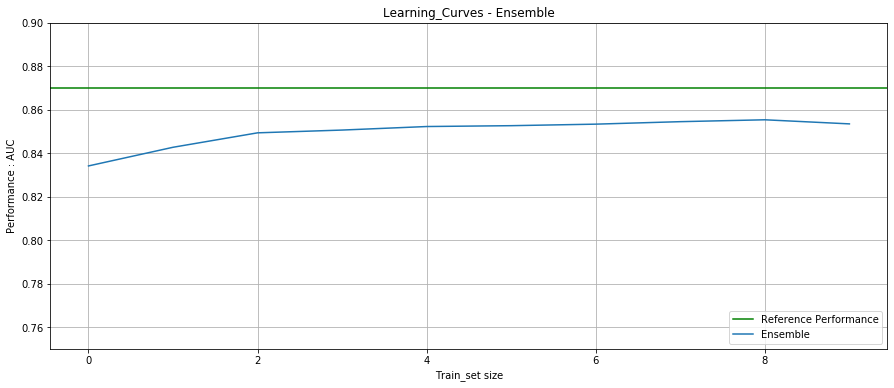

In [28]:
plt.xlabel("Train_set size")
plt.ylabel("Performance : AUC")
plt.title("Learning_Curves - Ensemble")
plt.grid()
plt.axhline(y=0.87, color = 'green', label="Reference Performance")
plt.ylim(0.75,0.9)
plt.plot(auc_val_e_set, label= "Ensemble")
plt.legend(loc='lower right')
plt.rcParams['figure.figsize'] = [15 , 6]
plt.show()

#### Graph perfomances of Ensemble vs Deepnet 

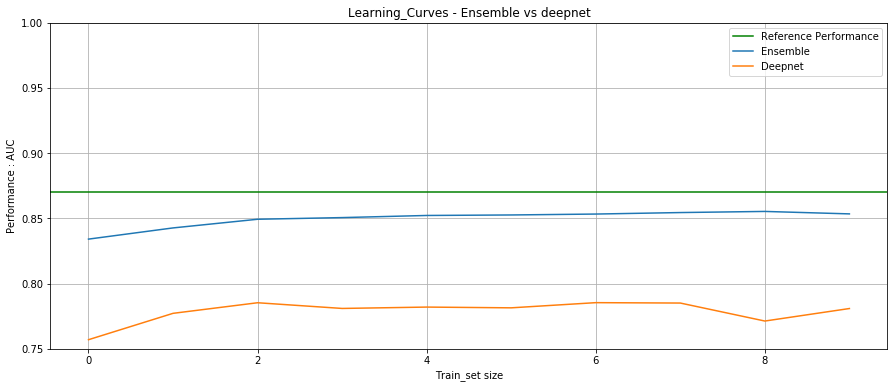

In [29]:
plt.xlabel("Train_set size")
plt.ylabel("Performance : AUC")
plt.title("Learning_Curves - Ensemble vs deepnet")
plt.grid()
plt.axhline(y=0.87, color = 'green', label="Reference Performance")
plt.ylim(0.75,1)
plt.plot(auc_val_e_set, label= "Ensemble")
plt.plot(auc_val_d_set, label= "Deepnet")
plt.legend(loc='upper right')
plt.rcParams['figure.figsize'] = [15 , 6]
plt.show()

#### Graph performances of Ensemble training vs validation set

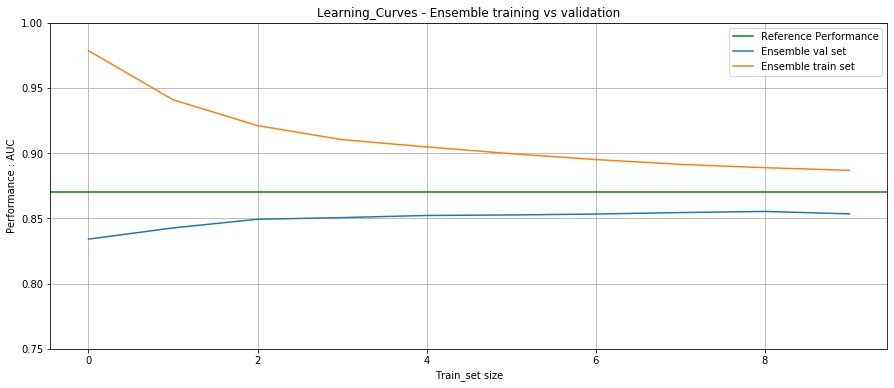

In [30]:
plt.xlabel("Train_set size")
plt.ylabel("Performance : AUC")
plt.title("Learning_Curves - Ensemble training vs validation")
plt.grid()
plt.axhline(y=0.87, color = 'green', label="Reference Performance")
plt.ylim(0.75,1)
plt.plot(auc_val_e_set, label= "Ensemble val set")
plt.plot(auc_train_e_set, label= "Ensemble train set")
plt.legend(loc='upper right')
plt.rcParams['figure.figsize'] = [15 , 6]
plt.show()

#### Graph performances of Deepnet training vs validation set

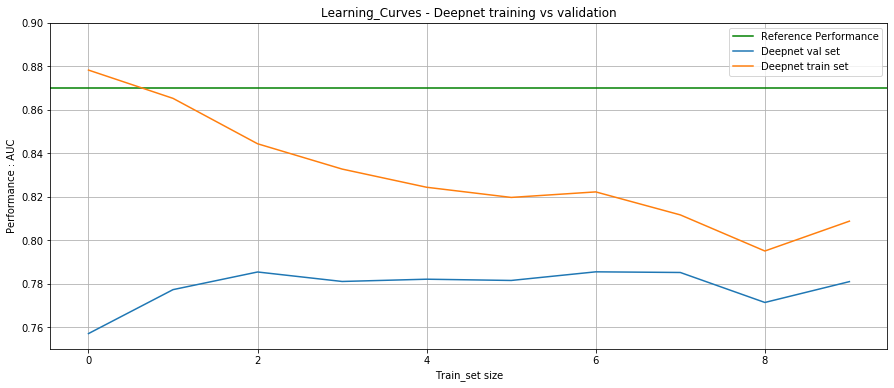

In [31]:
plt.xlabel("Train_set size")
plt.ylabel("Performance : AUC")
plt.title("Learning_Curves - Deepnet training vs validation")
plt.grid()
plt.axhline(y=0.87, color = 'green', label="Reference Performance")
plt.ylim(0.75,0.9)
plt.plot(auc_val_d_set, label= "Deepnet val set")
plt.plot(auc_train_d_set, label= "Deepnet train set")
plt.legend(loc='upper right')
plt.rcParams['figure.figsize'] = [15 , 6]
plt.show()